# **EXPLORACION DE DATOS**

**1**. Descargamos las librerias necesarias para analizar datos y cargar datos desde drive

In [139]:
%matplotlib inline
import numpy as np
import pandas as pd
!pip install gdown
import gdown

Los datos fueron recolectados en el mes de junio del año 2021

**2.** Carga de datos

In [140]:
file_id = "1Ja82_Sa7Y4gjv0PLFg6O6T3oG8HM3QO-"
url = f"https://drive.google.com/uc?id={file_id}"
output = "google_apps.csv"
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1Ja82_Sa7Y4gjv0PLFg6O6T3oG8HM3QO-
From (redirected): https://drive.google.com/uc?id=1Ja82_Sa7Y4gjv0PLFg6O6T3oG8HM3QO-&confirm=t&uuid=beb23748-7cb4-42a7-ad2a-f013d4ec1b1c
To: /content/google_apps.csv
100%|██████████| 676M/676M [00:10<00:00, 62.2MB/s]


'google_apps.csv'

Donde **file_id** es una cadena que contiene el identificador único del archivo en Google Drive. "1Ja82_Sa7Y4gjv0PLFg6O6T3oG8HM3QO-".

La URL construida utiliza el ID del archivo para crear un enlace de descarga directa. La URL https://drive.google.com/uc?id=FILE_ID es una forma de obtener el archivo directamente sin necesidad de interactuar con la interfaz web de Google Drive.
**output **es el nombre de la variable en el cual se guardará el archivo descargado en tu entorno de Colab. En este caso, el archivo se guardará como "google_apps.csv".

**3.** Lectura y analisis superficial y de dimensiones

In [141]:
google_apps = pd.read_csv(output)
google_apps.head(5)  # Mostrar las primeras filas del DataFrame

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.00,0.00,10+,10.00,15,True,0.00,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.40,64.00,"5,000+",5000.00,7662,True,0.00,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.00,0.00,50+,50.00,58,True,0.00,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.00,5.00,10+,10.00,19,True,0.00,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.00,0.00,100+,100.00,478,True,0.00,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [142]:
google_apps.shape

(2312944, 24)

Al obtener los encabezados y ver las 5 primeras filas podemos hacernos una idea de como se compone el archivo y tener presente el numero registros para apartir de ahi analizar si las operaciones son correctas, pues todas sus filas o registro suman 2312944

In [143]:
## Duplicados

google_apps.duplicated().sum()

0

In [144]:
## Pasar a Booleanos

In [145]:
google_apps[['Developer Website','Developer Email','Privacy Policy']] = google_apps[['Developer Website','Developer Email','Privacy Policy']].applymap(
    lambda x: False if pd.isna(x) else True)

<ipython-input-145-de1615d77cd8>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  google_apps[['Developer Website','Developer Email','Privacy Policy']] = google_apps[['Developer Website','Developer Email','Privacy Policy']].applymap(


**4.** Analisis de los tipos de variables

In [146]:
google_apps.dtypes

,0
App Name,object
App Id,object
Category,object
Rating,float64
Rating Count,float64
Installs,object
Minimum Installs,float64
Maximum Installs,int64
Free,bool
Price,float64


**5.** Analisis de Nulos y su porcentaje por variable

In [147]:
## Calcular el porcentaje de valores nulos
total_registros = google_apps.shape[0]
Total_nulos = google_apps.isnull().sum()
print(Total_nulos)
porcentaje_nulos=( Total_nulos/ total_registros) * 100

App Name                 5
App Id                   0
Category                 0
Rating               22883
Rating Count         22883
Installs               107
Minimum Installs       107
Maximum Installs         0
Free                     0
Price                    0
Currency               135
Size                   196
Minimum Android       6530
Developer Id            33
Developer Website        0
Developer Email          0
Released             71053
Last Updated             0
Content Rating           0
Privacy Policy           0
Ad Supported             0
In App Purchases         0
Editors Choice           0
Scraped Time             0
dtype: int64


In [148]:
# Mostrar el porcentaje de valores nulos con hasta seis decimales
porcentaje_nulos_formateado = porcentaje_nulos.map(lambda x: f"{x:.6f}")
print(porcentaje_nulos_formateado)

App Name             0.000216
App Id               0.000000
Category             0.000000
Rating               0.989345
Rating Count         0.989345
Installs             0.004626
Minimum Installs     0.004626
Maximum Installs     0.000000
Free                 0.000000
Price                0.000000
Currency             0.005837
Size                 0.008474
Minimum Android      0.282324
Developer Id         0.001427
Developer Website    0.000000
Developer Email      0.000000
Released             3.071972
Last Updated         0.000000
Content Rating       0.000000
Privacy Policy       0.000000
Ad Supported         0.000000
In App Purchases     0.000000
Editors Choice       0.000000
Scraped Time         0.000000
dtype: object


Podemos observar que la mayoria de nulos para cada variable son insignificante represente menos del 3%. No obstante, la variable Developer Website and Privacy Policy mas adelante veremos el analisis para cada variable.

In [149]:
# Eliminar columnas que no necesitamos
google_apps.drop(['App Id', 'Scraped Time','Maximum Installs','Privacy Policy', 'Installs' ],inplace=True,axis=1)
len(google_apps)

2312944

In [150]:
len(google_apps)

2312944

In [151]:
## Eliminar valores nulos restantes

google_apps.dropna(inplace=True)
len(google_apps)

2235275

In [152]:
# Convirtiendo la columna con fechas en formato datetime
google_apps.Released = pd.to_datetime(google_apps['Released'])
google_apps['Last Updated'] = pd.to_datetime(google_apps['Last Updated'])
google_apps['Released'].describe()

,Released
count,2235275
mean,2018-08-29 01:28:05.096821760
min,2010-01-28 00:00:00
25%,2017-07-01 00:00:00
50%,2019-03-19 00:00:00
75%,2020-04-15 00:00:00
max,2021-06-16 00:00:00


In [153]:
# vemos la cantidad de datos con los que nos vamos a quedar
len(google_apps[google_apps['Released'].dt.year > 2016 ])

1794432

In [154]:
## # Guardamos nuestro dataset con los ultimos 5 anos
google_apps = google_apps[google_apps['Released'].dt.year > 2016 ]

In [155]:
# decido crear un nuevo data frame y quedarme solamente con la ultima letra de los valores de esta columna para analizar que informacion tenemos
df_c = google_apps.copy()
df_c['Size type'] = df_c['Size'].apply(lambda x: x[-1])
df_c['Size type'].value_counts()

,count
Size type,
M,1749162
e,32439
k,12821
G,10


In [156]:
# Verificamos la informacion de los valores terminados en e
df_c[df_c['Size type'] == 'e']['Size']

,Size
137,Varies with device
140,Varies with device
154,Varies with device
180,Varies with device
182,Varies with device
...,...
2312632,Varies with device
2312651,Varies with device
2312677,Varies with device
2312738,Varies with device


In [157]:
# Eliminamos las columnas
google_apps = google_apps[google_apps['Size'] != "Varies with device"]
len(google_apps)

1761993

In [158]:
# Funcion para comvertir todo en megabytes
def to_megabytes(size):
    size = size.replace(',','') #remove commas
    if "M"in size:
        return float(size.replace('M',''))
    elif "k" in size:
        return float(size.replace('k','')) / 1024 # convert kb to MB format
    elif 'G' in size:
        return float(size.replace('G','')) * 1024 # convert Gb to MB format
    else:
        return np.nan

In [159]:
# apply function to the column
google_apps.Size = google_apps.Size.apply(to_megabytes)
google_apps.Size.info()

<class 'pandas.core.series.Series'>
Index: 1761993 entries, 0 to 2312943
Series name: Size
Non-Null Count    Dtype  
--------------    -----  
1761993 non-null  float64
dtypes: float64(1)
memory usage: 26.9 MB


In [160]:
##La mayoria de nuestros datos usan dolares como moneda. Vamos a eliminar los datos sobrantes

google_apps = google_apps[google_apps['Currency'] == 'USD']
google_apps.drop('Currency',inplace=True,axis=1)

In [161]:
google_apps = google_apps[google_apps['Minimum Android'] != 'Varies with device']
len(google_apps)

1759929

In [162]:
def min_android(adroid):
    return float(adroid[:3])

In [163]:
# apply the function

google_apps['Minimum Android'] = google_apps['Minimum Android'].apply(min_android)
google_apps['Minimum Android'].info()

<class 'pandas.core.series.Series'>
Index: 1759929 entries, 0 to 2312943
Series name: Minimum Android
Non-Null Count    Dtype  
--------------    -----  
1759929 non-null  float64
dtypes: float64(1)
memory usage: 26.9 MB


In [164]:
print(f'''
Numero de Categorias : {len(google_apps.Rating.value_counts())}
Conteo por Categorias: {google_apps.Rating.value_counts()}
''')


Numero de Categorias : 42
Conteo por Categorias: Rating
0.00    919778
5.00     85513
4.40     57509
4.20     57433
4.30     54687
4.60     54386
4.50     51735
4.80     46038
4.70     44133
4.10     44033
4.00     43103
4.90     35587
3.90     34806
3.80     34049
3.70     27329
3.60     23030
3.50     20039
3.40     18910
3.30     14484
3.20     14009
3.00     11534
3.10     10015
2.80      8024
2.90      7432
2.60      6285
2.70      6073
2.50      4561
2.40      3965
2.30      3655
2.20      3304
2.00      2571
2.10      2451
1.80      2092
1.90      1713
1.70      1349
1.60      1153
1.50       819
1.40       718
1.00       618
1.30       428
1.20       402
1.10       176
Name: count, dtype: int64



In [165]:
google_apps['Rating'] = pd.to_numeric(google_apps['Rating'])
google_apps['Rating Count'] = pd.to_numeric(google_apps['Rating Count'])
google_apps['Price'] = pd.to_numeric(google_apps['Price'])
google_apps['Size'] = pd.to_numeric(google_apps['Size'])
google_apps['Minimum Android'] = pd.to_numeric(google_apps['Minimum Android'])


In [166]:
# Convertir la columna 'rating' a formato con coma decimal
google_apps['Rating'] = google_apps['Rating'].apply(lambda x: "{:.2f}".format(x).replace('.', ','))

# Mostrar las primeras filas para ver el resultado
print(google_apps['Rating'].head())

# Convertir la columna 'rating' a formato con coma decimal
google_apps['Rating Count'] = google_apps['Rating Count'].apply(lambda x: "{:.2f}".format(x).replace('.', ','))

# Mostrar las primeras filas para ver el resultado
print(google_apps['Rating Count'].head())

0    0,00
1    4,40
2    0,00
3    5,00
4    0,00
Name: Rating, dtype: object
0     0,00
1    64,00
2     0,00
3     5,00
4     0,00
Name: Rating Count, dtype: object


In [167]:
# Convertir la columna 'rating' a formato con coma decimal
google_apps['Price'] = google_apps['Price'].apply(lambda x: "{:.2f}".format(x).replace('.', ','))

# Mostrar las primeras filas para ver el resultado
print(google_apps['Price'].head())

0    0,00
1    0,00
2    0,00
3    0,00
4    0,00
Name: Price, dtype: object


In [168]:
# Convertir la columna 'rating' a formato con coma decimal
google_apps['Size'] = google_apps['Size'].apply(lambda x: "{:.2f}".format(x).replace('.', ','))

# Mostrar las primeras filas para ver el resultado
print(google_apps['Size'].head())

0    10,00
1     2,90
2     3,70
3     1,80
4     6,20
Name: Size, dtype: object


In [169]:
# Convertir la columna 'rating' a formato con coma decimal
google_apps['Minimum Android'] = google_apps['Minimum Android'].apply(lambda x: "{:.2f}".format(x).replace('.', ','))

# Mostrar las primeras filas para ver el resultado
print(google_apps['Minimum Android'].head())

0    7,10
1    5,00
2    4,00
3    4,00
4    4,10
Name: Minimum Android, dtype: object


In [170]:
google_apps['Free'] = google_apps['Free'].astype(bool)
google_apps['Developer Website'] = google_apps['Developer Website'].astype(bool)
google_apps['Ad Supported'] = google_apps['Ad Supported'].astype(bool)
google_apps['In App Purchases'] = google_apps['In App Purchases'].astype(bool)
google_apps['Editors Choice'] = google_apps['Editors Choice'].astype(bool)

In [ ]:
google_apps.columns

Index(['App Name', 'Category', 'Rating', 'Rating Count', 'Minimum Installs',
       'Free', 'Price', 'Size', 'Minimum Android', 'Developer Id',
       'Developer Website', 'Developer Email', 'Released', 'Last Updated',
       'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice'],
      dtype='object')

In [173]:
google_apps.describe()

,Minimum Installs,Released,Last Updated
count,1759929.00,1759929,1759929
mean,57698.05,2019-07-06 21:58:50.766753792,2020-03-22 09:35:01.795470080
min,0.00,2017-01-01 00:00:00,2012-09-14 00:00:00
25%,50.00,2018-08-07 00:00:00,2019-08-18 00:00:00
50%,100.00,2019-09-09 00:00:00,2020-06-27 00:00:00
75%,1000.00,2020-06-20 00:00:00,2021-02-18 00:00:00
max,1000000000.00,2021-06-16 00:00:00,2021-06-16 00:00:00
std,2301898.03,NaN,NaN


In [174]:
google_apps.to_csv(r'C:\Users\ps\Documents\DATAPPS\googleappsfinal.csv', index=False, sep=';')

In [175]:
from google.colab import files

# Descargar el archivo CSV
files.download(r'C:\Users\ps\Documents\DATAPPS\googleappsfinal.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**6.** Analisis Estadistica Descriptiva para variables numericas

In [ ]:
# Si trabajo solo con describe si colocarle formato me mostrara los resultados en notacion cientifica
##2.290061e+06 2.290061x10 elevado6
pd.set_option('display.float_format', '{:.2f}'.format)
google_apps.describe()

,Rating,Rating Count,Minimum Installs,Price,Size,Minimum Android,Released,Last Updated
count,1759929.00,1759929.00,1759929.00,1759929.00,1759929.00,1759929.00,1759929,1759929
mean,1.98,809.13,4.45,0.07,19.92,4.45,2019-07-06 21:58:50.766753792,2020-03-22 09:35:01.795470080
min,0.00,0.00,1.00,0.00,0.00,1.00,2017-01-01 00:00:00,2012-09-14 00:00:00
25%,0.00,0.00,4.10,0.00,5.30,4.10,2018-08-07 00:00:00,2019-08-18 00:00:00
50%,0.00,0.00,4.20,0.00,11.00,4.20,2019-09-09 00:00:00,2020-06-27 00:00:00
75%,4.20,24.00,5.00,0.00,26.00,5.00,2020-06-20 00:00:00,2021-02-18 00:00:00
max,5.00,18066559.00,8.00,400.00,1536.00,8.00,2021-06-16 00:00:00,2021-06-16 00:00:00
std,2.12,33684.10,0.76,2.62,24.52,0.76,NaN,NaN


Al observar la desviacion standard, nos damos cuenta que las variables numericas son dispersas, es decir, no homogeneas. Asi, por ejemplo. El rating tiene un promedio de 2 y su desviacion al ser de 2 indicaria que hay calificaciones en 0 o 4 puntos.

**Rating:** Es el valor de la calificación
**Rating acount:** es la cantidad de veces que esa calificación ha sido dada.
**Minimum Installs:** representa el número mínimo estimado de instalaciones.
**Maximum Installs: **representa el número máximo estimado de instalaciones. Este valor es una estimación superior que puede ser el límite máximo conocido o reportado para el número de instalaciones.
**Price:** Es el precio de la aplicacion.

Todas las variables son importantes para el calculo del modelo, dado que puede ser causal para que un cliente o usuario decida evaluarlo.

Ahora bien el valor minimo y maximo, podria usarse para crear una variable categoria que permita rankear la popularidad de la app o en que fase de crecimiento o stadia se encuentra.

Frente a los nulos considerando que para las variables numericas son menos del 1%, podemos llenar los datos con la moda de la distribucion mas alta, en lugar de eliminar los datos, a fin de preservar la mayor cantidad de datos posibles para el estudio y guardar integridad.


In [ ]:
# calculo los bins para el historgrama
ratings = google_apps['Rating']
n = len(ratings)
print(n)
bins_sturges = int(np.ceil(np.log2(n) + 1))
print(bins_sturges)

## Aunque el calculo de bins dio 23, se tomo 5 asumiendo la logica de que la calificacion es hasta 5

2312944
23


array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

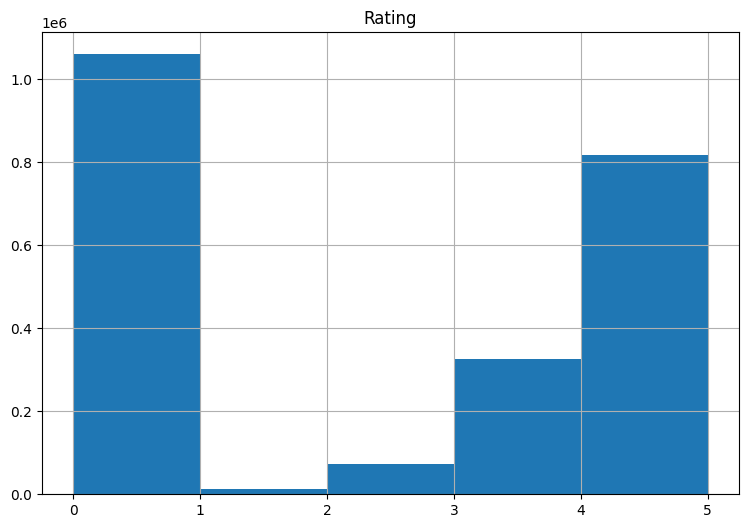

In [ ]:
google_apps.hist(column='Rating',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=5)         # Number of histogram bins

**7.** Analisis Estadistica descriptiva para variables categoricas

In [ ]:
google_apps.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [ ]:
categorical = google_apps.dtypes[google_apps.dtypes == "object"].index
print(categorical)

google_apps[categorical].describe()

Index(['App Name', 'App Id', 'Category', 'Installs', 'Currency', 'Size',
       'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Scraped Time'],
      dtype='object')


,App Name,App Id,Category,Installs,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Scraped Time
count,2312944,2312944,2312944,2312837,2312809,2312748,2306414,2312911,1552109,2312913,2241891,2312944,2312944,1891991,2312944
unique,2177938,2312944,48,22,15,1657,154,758371,810440,950456,4158,3918,6,977743,67374
top,Tic Tac Toe,com.ishakwe.gakondo,Education,100+,USD,Varies with device,4.1 and up,Subsplash Inc,http://www.subsplash.com/,support@classplus.co,"Jun 16, 2020","Jun 10, 2021",Everyone,http://www.subsplash.com/legal/privacy,2021-06-16 07:35:57
freq,382,1,241090,443368,2311548,74777,604465,5422,7519,10345,2051,11186,2022089,7481,56


**Count: **Muestra el conteo de registros no nulos,
**Categorias Unicas**: El número de categorías únicas.
**Top:** El valor que ocurre con mayor frecuencia y
**Freq:** El número de ocurrencias del valor más frecuente.

7.1 Variable App name y App Id

In [ ]:
# Eliminar espacios en blanco al inicio y final de palabras
google_apps['App Name'] = google_apps['App Name'].astype(str).str.strip()

# Contar la cantidad de veces que aparece cada nombre de aplicación
app_name_counts = google_apps['App Name'].value_counts()

# Filtrar solo los nombres de aplicaciones que se repiten (es decir, aquellos que aparecen más de una vez)
repeated_apps = app_name_counts[app_name_counts > 1]

# Ver cuántos nombres de aplicaciones se repiten
print(len(repeated_apps))

# Mostrar los nombres de las aplicaciones que se repiten y cuántas veces lo hacen
print(repeated_apps)

67489
App Name
Tic Tac Toe                     382
Calculator                      261
Flashlight                      256
BMI Calculator                  201
Age Calculator                  190
                               ... 
Unstoppable                       2
Makar Sankranti                   2
RaiConnect                        2
Exam Warriors                     2
Biblia Dios Habla Hoy Gratis      2
Name: count, Length: 67489, dtype: int64


In [ ]:
#Sumar las frecuencias de las aplicaciones que se repiten
total_repeated_frequency = repeated_apps.sum()
print(total_repeated_frequency)

202495


In [ ]:
#Si cojes la suma de las frecuencias 202490 y le restas los valos no unicos 134996 da 67488 que son los nombres de aplicaciones que se repiten

In [ ]:
unique_apps=google_apps["App Name"].unique()

In [ ]:
if 'Tic Tac Toe' in unique_apps:
    print("'Tic Tac Toe' está presente en los valores únicos de 'App Name'.")
else:
    print("'Tic Tac Toe' no está presente en los valores únicos de 'App Name'.")

In [ ]:
null_count = google_apps['App Name'].isna().sum()
print("Cantidad de valores nulos:", null_count)

In [ ]:
nan_rows = google_apps[google_apps['App Name'] == 'nan']

Al revisar la variable name se puede prescindir por que   de rainting, puede predecirse con base a las categorias en las que se clasificaron los nombres de las apps, asi mismo cada app name, tiene un identificador unico, por lo que se identifican son valores unicos.No obstante, podria dejarse como para evaluar casos en particular o solo observar cual fue la app independiente que mayor auge tuvo en ese tiempo.

**7.2** Variable Category

In [ ]:
app_category_counts = google_apps['Category'].value_counts()
print(app_category_counts)

Category
Education                  241090
Music & Audio              154906
Tools                      143988
Business                   143771
Entertainment              138276
Lifestyle                  118331
Books & Reference          116728
Personalization             89210
Health & Fitness            83510
Productivity                79698
Shopping                    75256
Food & Drink                73927
Travel & Local              67288
Finance                     65466
Arcade                      53792
Puzzle                      51168
Casual                      50813
Communication               48167
Sports                      47483
Social                      44734
News & Magazines            42807
Photography                 35552
Medical                     32065
Action                      27555
Maps & Navigation           26722
Simulation                  23282
Adventure                   23203
Educational                 21308
Art & Design                18539
Auto 

In [ ]:
unique_category =google_apps['Category'].unique()
print(unique_category)

['Adventure' 'Tools' 'Productivity' 'Communication' 'Social'
 'Libraries & Demo' 'Lifestyle' 'Personalization' 'Racing'
 'Maps & Navigation' 'Travel & Local' 'Food & Drink' 'Books & Reference'
 'Medical' 'Puzzle' 'Entertainment' 'Arcade' 'Auto & Vehicles'
 'Photography' 'Health & Fitness' 'Education' 'Shopping' 'Board'
 'Music & Audio' 'Sports' 'Beauty' 'Business' 'Educational' 'Finance'
 'News & Magazines' 'Casual' 'Art & Design' 'House & Home' 'Card' 'Events'
 'Trivia' 'Weather' 'Strategy' 'Word' 'Video Players & Editors' 'Action'
 'Simulation' 'Music' 'Dating' 'Role Playing' 'Casino' 'Comics'
 'Parenting']


En definitiva la variable categoria entra al modelo, dado que muchas categorias tienen repeticiones, lo cual significa que puede indicar un tendencia en preferencia.

**7.3** Variable Installs

In [ ]:
app_installs_counts = google_apps['Installs'].value_counts()
print(app_installs_counts)

Installs
100+               443368
1,000+             398199
10+                300156
10,000+            256723
500+               189077
50+                170465
5,000+             143593
100,000+           110257
50,000+             75359
5+                  73772
1+                  65345
1,000,000+          33650
500,000+            27012
0+                  11566
5,000,000+           6595
10,000,000+          6192
50,000,000+           824
100,000,000+          549
500,000,000+           65
1,000,000,000+         55
5,000,000,000+         14
10,000,000,000+         1
Name: count, dtype: int64


Importante tene presente que la variable instalaciones no representa un valor exacto, sino un rango, lo que significa que el valor real esta dentro de ese rango, para ver un poco mas a detalle podria colocarse minimo y maximo rango como para saber que significa cada categoria de instalacion.

In [ ]:
grouped = google_apps.groupby('Installs').agg({
    'Installs': 'size',  # Cuenta la cantidad de registros en cada categoría
    'Minimum Installs': 'mean',  # Calcula el promedio de 'Minimum Installs'
    'Maximum Installs': 'mean'   # Calcula el promedio de 'Maximum Installs'
}).rename(columns={'Installs': 'Count'})

# Mostrar el DataFrame resultante
print(grouped)

                  Count  Minimum Installs  Maximum Installs
Installs                                                   
0+                11566                 0                 0
1+                65345                 1                 3
1,000+           398199              1000              2414
1,000,000+        33650           1000000           2190986
1,000,000,000+       55        1000000000        1923280267
10+              300156                10                26
10,000+          256723             10000             23369
10,000,000+        6192          10000000          20419891
10,000,000,000+       1       10000000000       12057627016
100+             443368               100               249
100,000+         110257            100000            225027
100,000,000+        549         100000000         200749723
5+                73772                 5                 7
5,000+           143593              5000              7148
5,000,000+         6595           500000

Como no es un numero exacto se puede dejar como categoria la variable installs de tal forma, que se pueda colocar como una de las variables deterministica de su popularidad, por que si se deja numerica es como si colocaramos solo la cantidad minimo de veces que se descargo, o si deseamos trabajar con el maximo no son valores exacto, pero con el minimo y maximo podemos ver por ejemplo que 1000+ puede ser desde 1000 hasta 2000

Agrupación Sugerida
Grupo 1 - Pequeñas Instalaciones:

0+ (0)
1+ (1-3)
10+ (10-26)
50+ (50-72)
100+ (100-249)
500+ (500-717)
Grupo 2 - Instalaciones Medias:

1,000+ (1000-2414)
5,000+ (5000-7148)
10,000+ (10000-23369)
50,000+ (50000-70982)
100,000+ (100000-225027)
500,000+ (500000-706736)
Grupo 3 - Instalaciones Altas:

1,000,000+ (1000000-2190986)
5,000,000+ (5000000-7033349)
10,000,000+ (10000000-20419891)
50,000,000+ (50000000-69355011)
100,000,000+ (100000000-200749723)
500,000,000+ (500000000-724601812)
Grupo 4 - Instalaciones Muy Altas:

1,000,000,000+ (1000000000-1923280267)
5,000,000,000+ (5000000000-7446282683)
10,000,000,000+ (10000000000-12057627016)

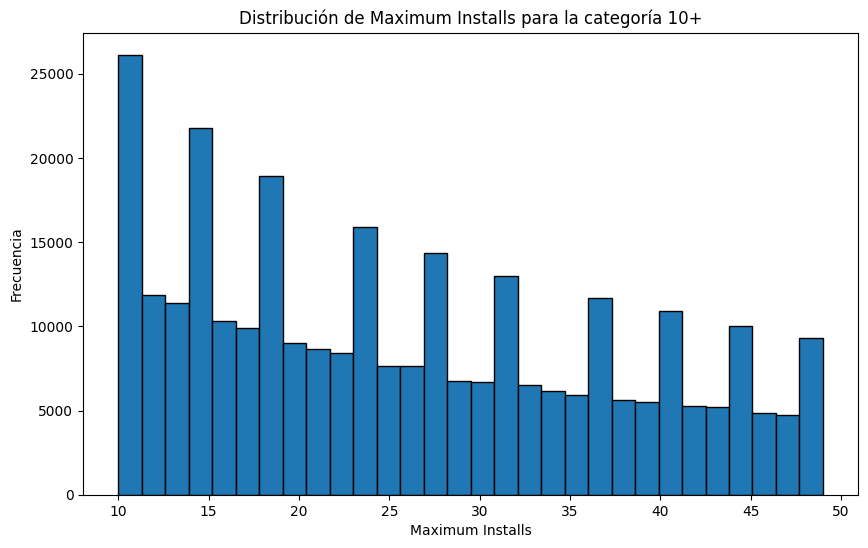

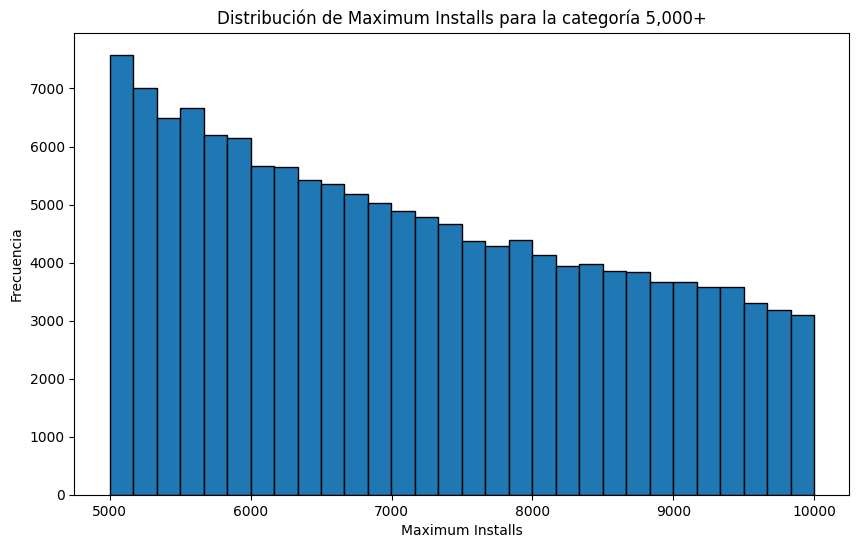

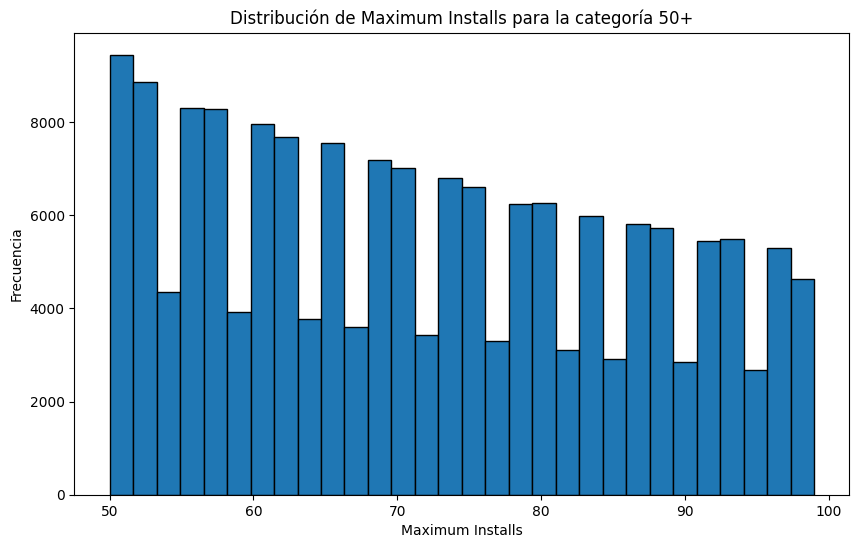

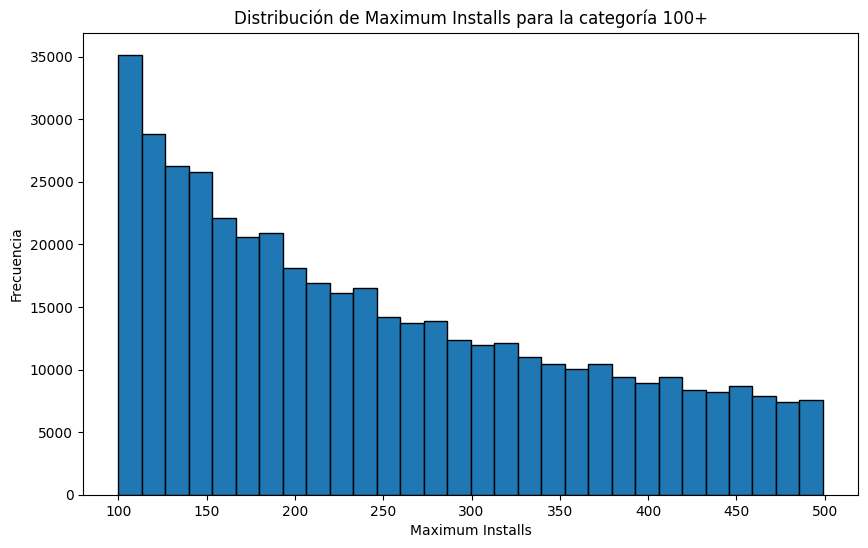

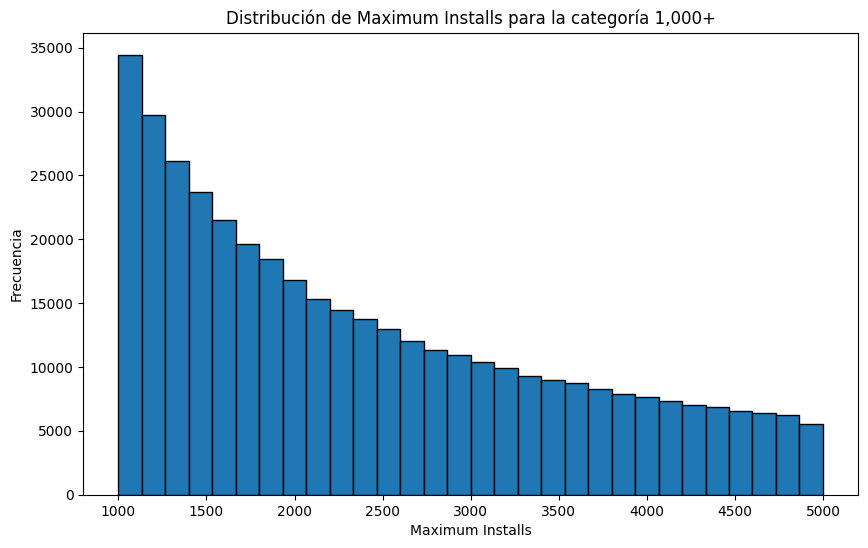

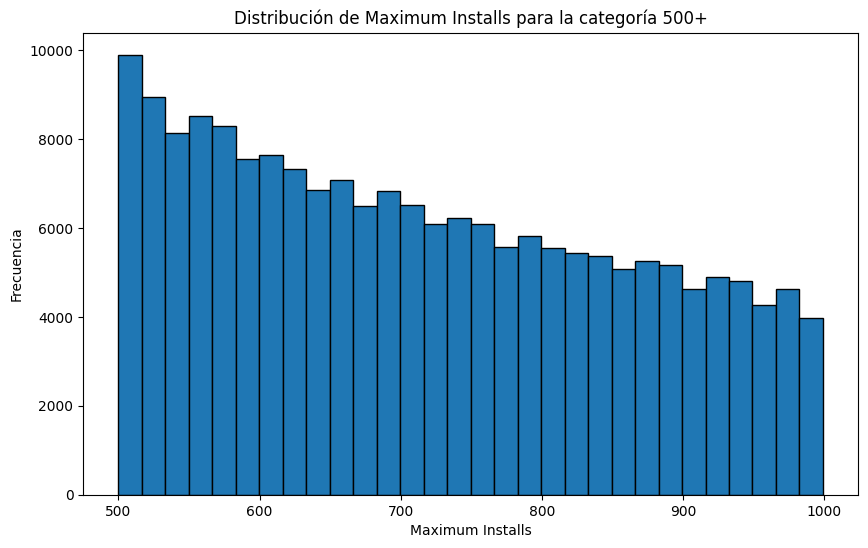

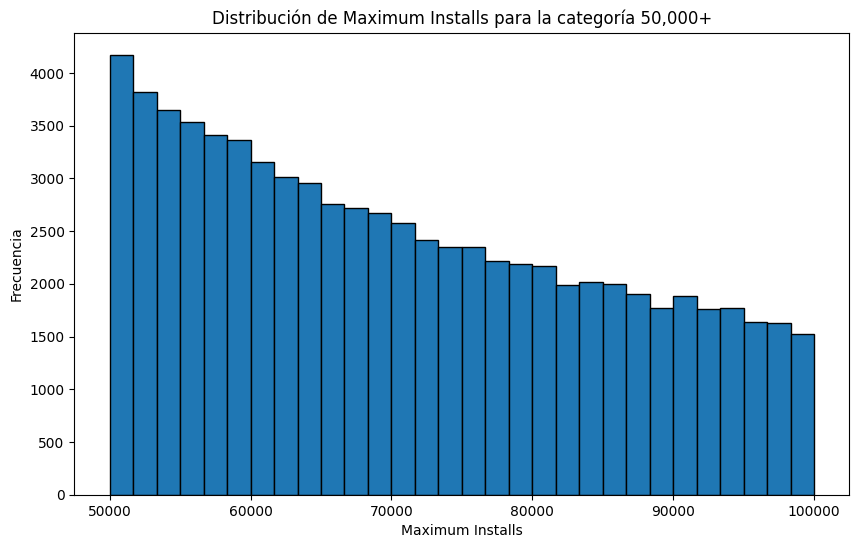

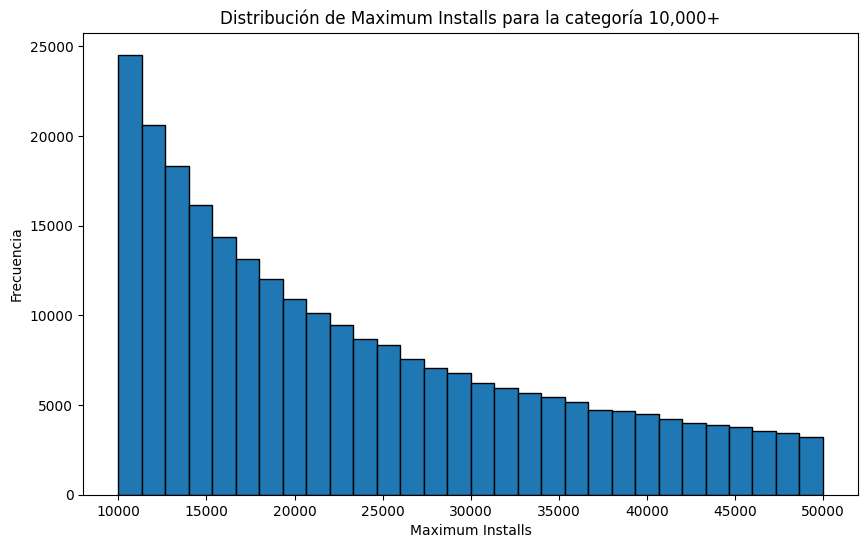

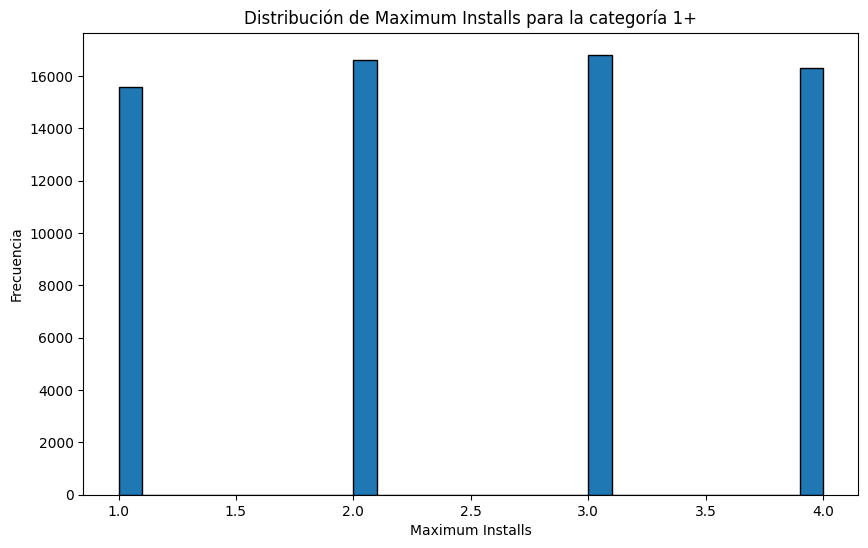

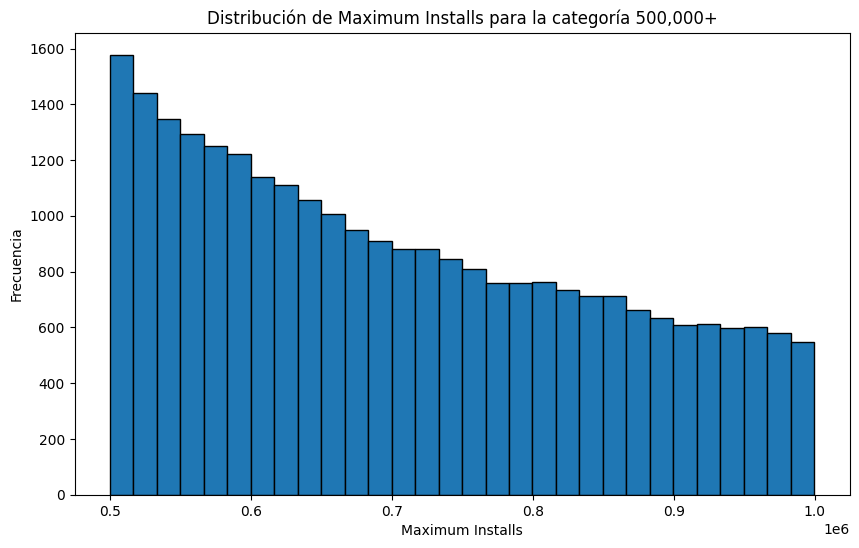

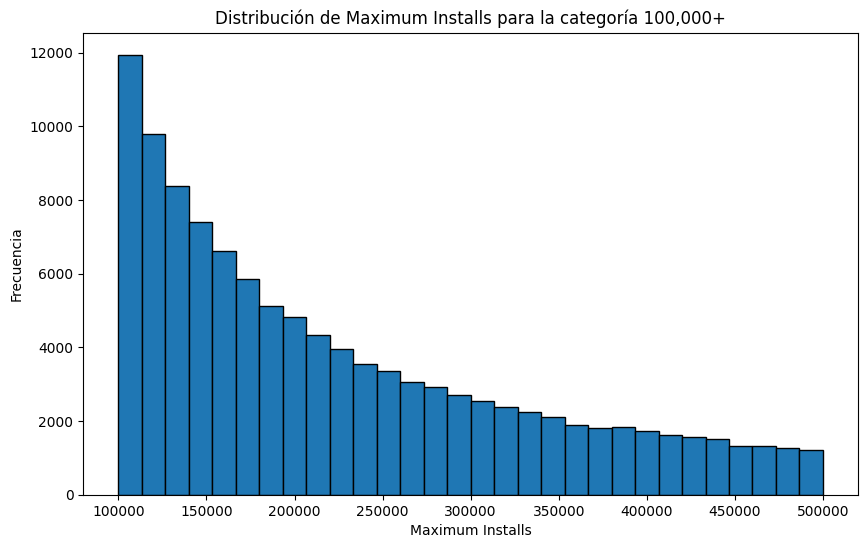

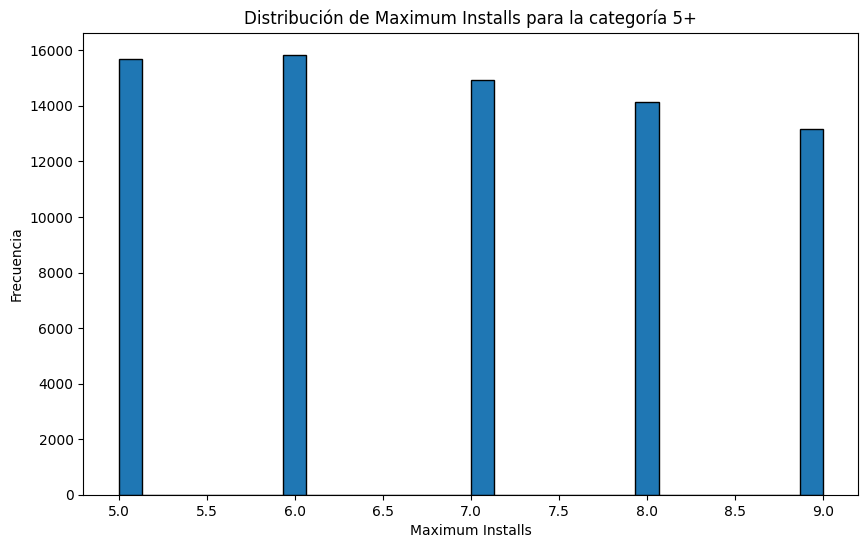

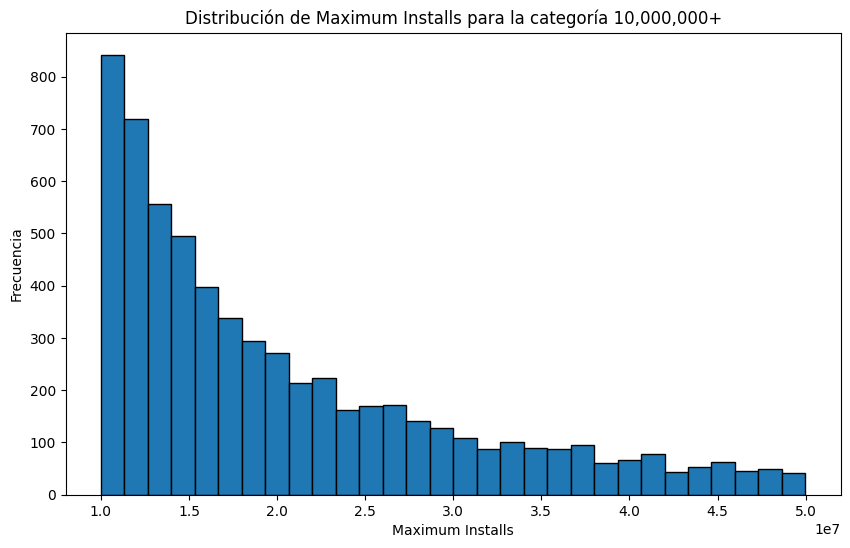

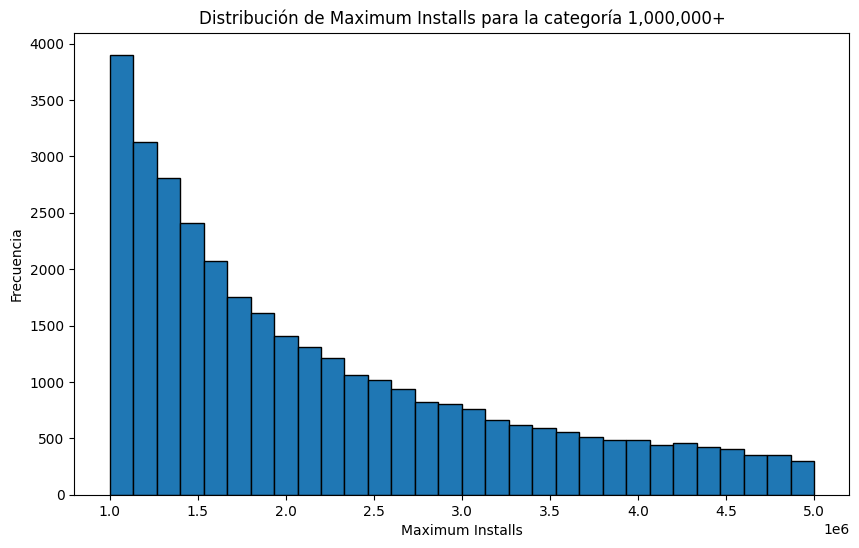

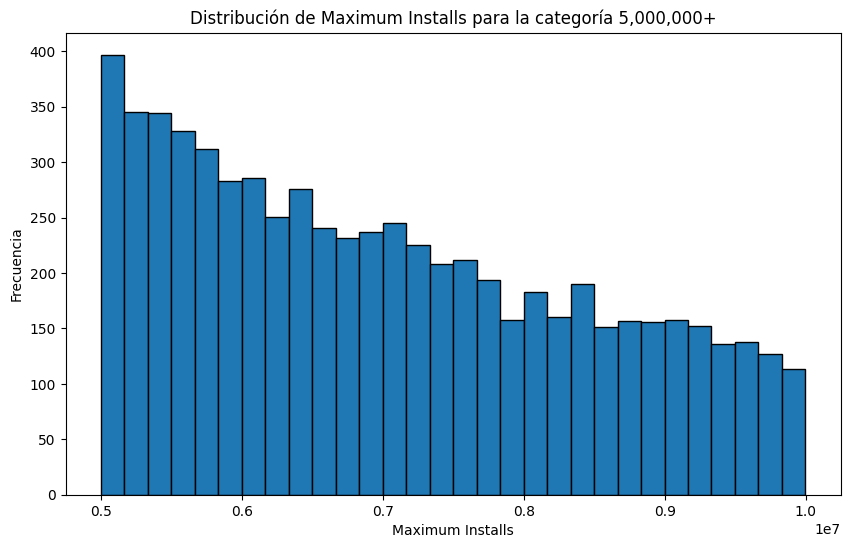

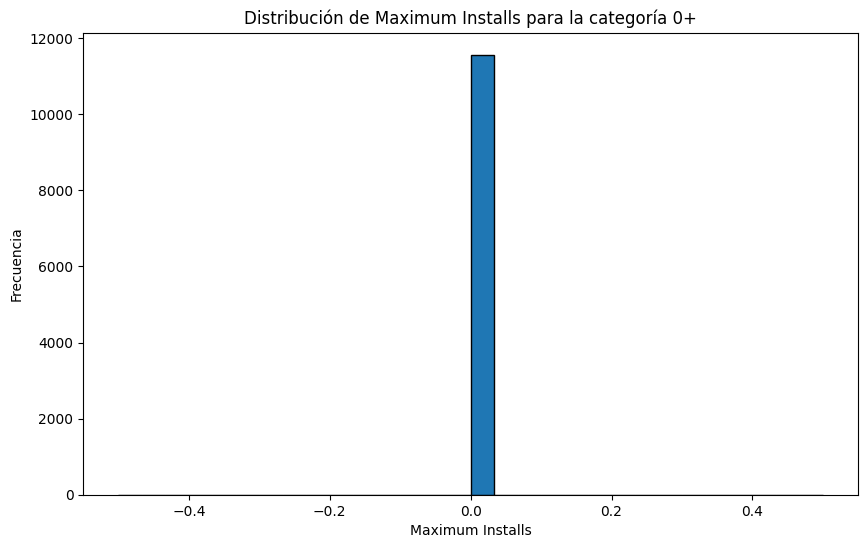

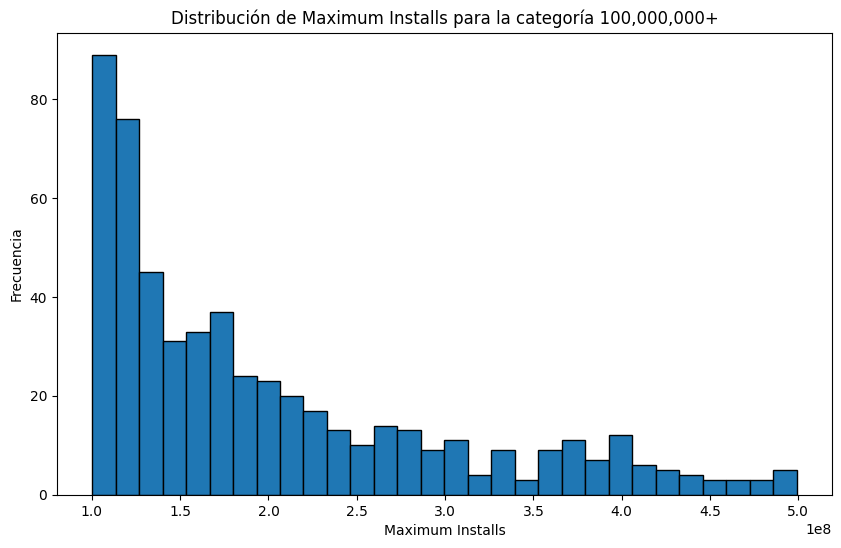

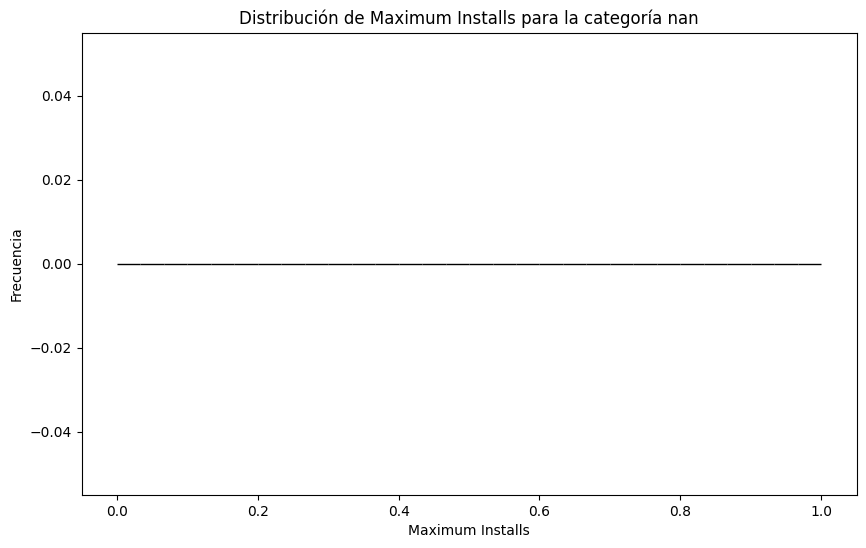

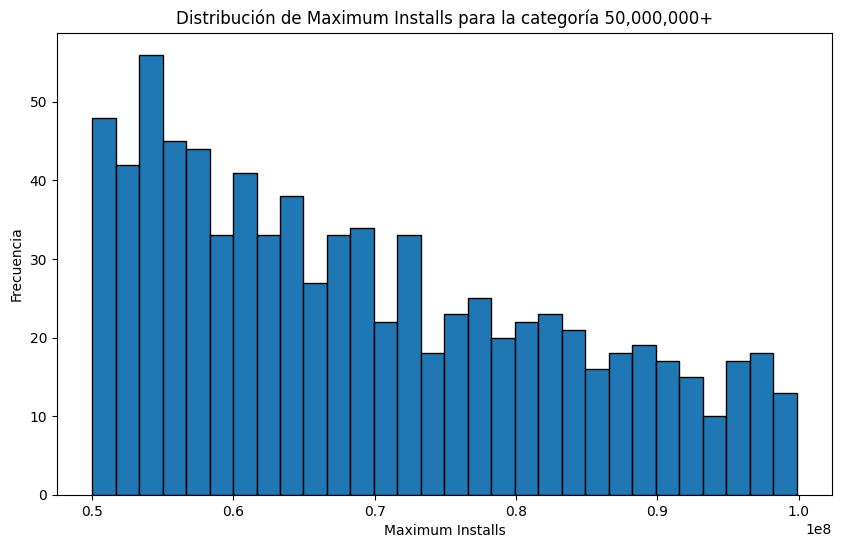

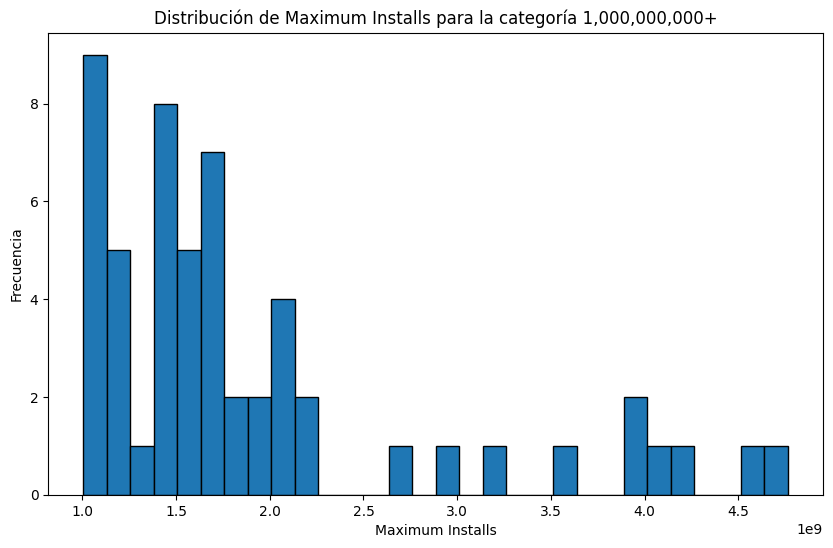

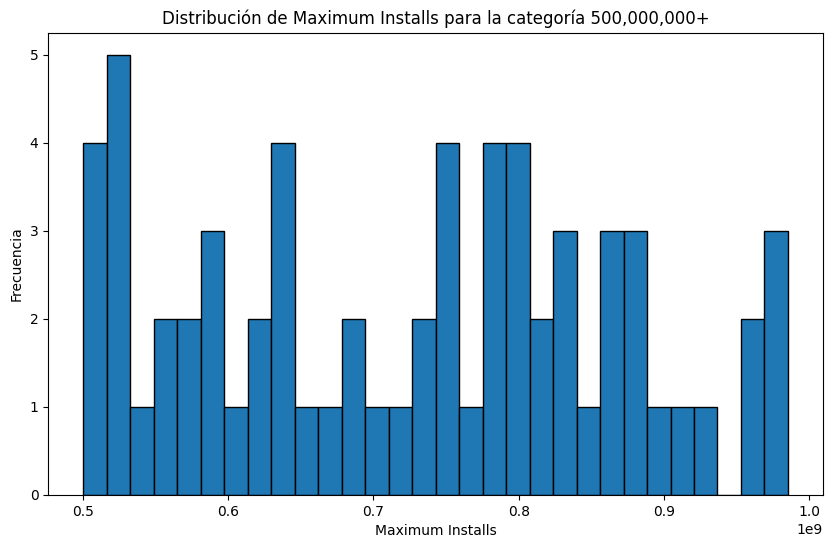

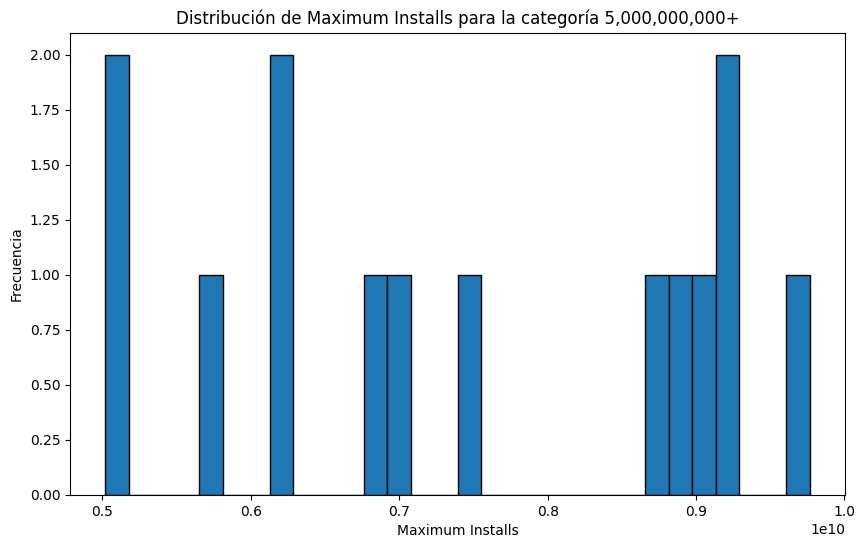

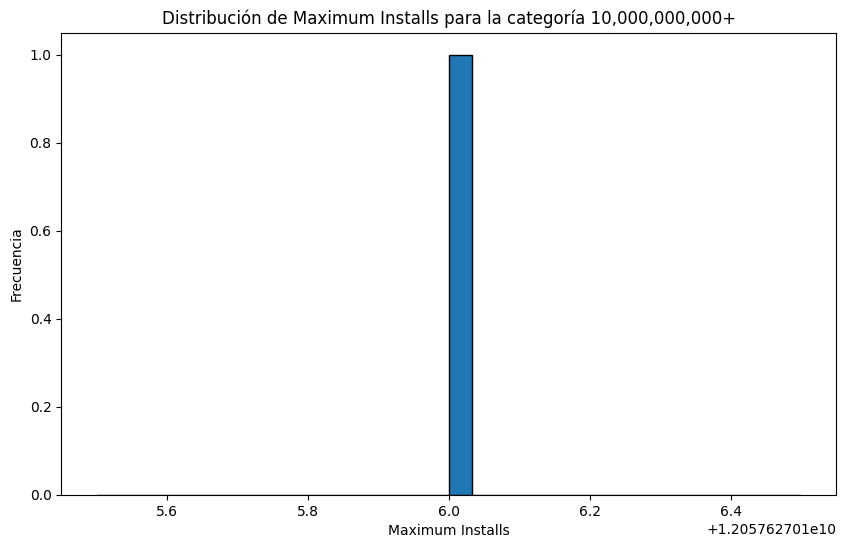

In [ ]:
import matplotlib.pyplot as plt

# Obtener las categorías únicas de 'Installs'
categorias_installs = google_apps['Installs'].unique()

# Crear un histograma para cada categoría de 'Installs'
for categoria in categorias_installs:
    plt.figure(figsize=(10, 6))
    subset = google_apps[google_apps['Installs'] == categoria]

    # Crear el histograma
    plt.hist(subset['Maximum Installs'], bins=30, edgecolor='black')

    # Añadir título y etiquetas
    plt.title(f'Distribución de Maximum Installs para la categoría {categoria}')
    plt.xlabel('Maximum Installs')
    plt.ylabel('Frecuencia')

    # Mostrar el gráfico
    plt.show()

Definir Rangos de Agrupación
Podemos definir tus propios rangos para agrupar las categorías basadas en el número máximo de instalaciones. Aquí hay algunos ejemplos:

Agrupación Basada en Rangos Numéricos:

Agrupa en intervalos como 0-100, 100-1,000, 1,000-10,000, etc.
Agrupación Basada en Decenas o Potencias de 10:

Agrupa en categorías como 1+, 10+, 100+, 1,000+, 10,000+, etc.

**7.4**.Variable Currency o Moneda

In [ ]:
app_currency_counts = google_apps['Currency'].value_counts()
print(app_currency_counts)

Currency
USD    2311548
XXX       1236
EUR          6
INR          5
GBP          3
CAD          2
VND          1
BRL          1
KRW          1
TRY          1
RUB          1
SGD          1
AUD          1
PKR          1
ZAR          1
Name: count, dtype: int64


Hay 1236 datos que no sabemos su moneda y por lo tanto no podemos convertila a una sola moneda como el dolar para su estudio,  podria prescindir de ellos eliminando no son muchos registros o podriamos imputarle la moneda dolar ya que es la predominante.

**7.5**. Analisis variable Size o tamaño de la aplicacion

In [ ]:
app_size_counts = google_apps['Size'].value_counts()
print(app_size_counts)

Size
Varies with device    74777
11M                   62157
12M                   56080
13M                   48034
14M                   45211
                      ...  
8.7k                      1
784M                      1
385M                      1
7.6k                      1
512M                      1
Name: count, Length: 1657, dtype: int64


In [ ]:
unique_size =google_apps['Size'].unique()
print(unique_size)

['10M' '2.9M' '3.7M' ... '405M' '3.2k' '512M']


Importante varies with device no es especifico se pueden eliminar o se puede elegir imputarlos con base a la distribucion de los datos. Establecer todos los datos en MB en una sola medida.

**7.6**. Analisis variable Minimum Android o versión mínima del sistema operativo Android

In [ ]:
app_miniumandroid_counts = google_apps['Minimum Android'].value_counts()
print(app_miniumandroid_counts)

Minimum Android
4.1 and up      604465
5.0 and up      396998
4.4 and up      390311
4.0.3 and up    180482
4.0 and up      153441
                 ...  
2.3 - 3.2            1
6.0 - 7.1.1          1
2.3 - 8.0            1
3.0 - 7.1.1          1
2.3.3 - 6.0          1
Name: count, Length: 154, dtype: int64


In [ ]:
unique_miniumandroid=google_apps['Minimum Android'].unique()
print(unique_miniumandroid)

['7.1 and up' '5.0 and up' '4.0.3 and up' '4.1 and up' '6.0 and up'
 '4.4 and up' '4.0 and up' '4.2 and up' '2.1 and up' '7.0 and up'
 '2.2 and up' '2.3 and up' '4.3 and up' '5.1 and up' nan '1.6 and up'
 '3.0 and up' 'Varies with device' '8.0 and up' '2.3.3 and up'
 '4.4W and up' '3.2 and up' '1.5 and up' '4.0.3 - 7.1.1' '3.1 and up'
 '2.0 and up' '1.0 and up' '1.1 and up' '2.0.1 and up' '4.4 - 6.0'
 '2.1 - 4.4' '4.0 - 5.0' '2.0 - 2.3.4' '2.2 - 4.4' '4.1 - 7.0' '4.1 - 6.0'
 '4.0 - 4.4W' '4.0 - 4.4' '4.0.3 - 7.0' '2.3 - 5.0' '4.0 - 7.1.1'
 '4.1 - 7.1.1' '4.0 - 7.0' '4.1 - 8.0' '4.0 - 6.0' '2.3 - 7.0' '4.0 - 8.0'
 '2.3 - 6.0' '2.1 - 2.3.4' '3.0 - 4.1.1' '2.2 - 3.0' '2.0 - 8.0'
 '4.0.3 - 8.0' '3.0 - 4.4W' '4.4 - 7.1.1' '4.4 - 8.0' '4.0.3 - 6.0'
 '1.6 - 4.0.4' '8.0' '2.3 - 5.1' '2.1 - 7.1.1' '2.3 - 4.4W' '4.4 - 7.0'
 '6.0 - 7.1.1' '2.3 - 4.4' '2.2 - 4.0.4' '2.1 - 4.1.1' '3.0 - 8.0'
 '3.0 - 5.1' '2.1 - 6.0' '6.0 - 8.0' '5.0 - 8.0' '4.1 - 5.1' '3.2 - 4.4'
 '2.1 - 5.0' '4.1 - 4.3' '5.0 - 6.0

Esta variable puede representar un elemento esencial a la hora de quedarse con una aplicacion, por que debe ser compatible con la mayoria de sistemas.

**7.6**. Analisis variable Developer Id

In [ ]:
# Agrupar por Developer Id y calcular las estadísticas solicitadas
estadisticas_por_desarrollador = google_apps.groupby('Developer Id').agg(
    Conteo_Apps=('Developer Id', 'size'),       # Conteo de aplicaciones por Developer Id
    Promedio_Rating=('Rating', 'mean'),         # Promedio del Rating por Developer Id
    Desviacion_Estandar_Rating=('Rating', 'std') # Desviación estándar del Rating por Developer Id
)

# Ordenar por el conteo de aplicaciones en orden descendente
estadisticas_por_desarrollador = estadisticas_por_desarrollador.sort_values(by='Conteo_Apps', ascending=False)

# Mostrar la tabla resultante
print(estadisticas_por_desarrollador)

                     Conteo_Apps  Promedio_Rating  Desviacion_Estandar_Rating
Developer Id                                                                 
Subsplash Inc               5422                2                           2
TRAINERIZE                  5153                0                           1
ChowNow                     4865                0                           1
OrderYOYO                   2884                0                           1
Phorest                     2821                0                           1
...                          ...              ...                         ...
Jarno Wiez                     1                0                         NaN
Jaro De Roose                  1                0                         NaN
Jaro Hokkanen                  1                4                         NaN
Jarob                          1                0                         NaN
🧙🏼Lucrezia - MMORPG            1                4               

Este análisis podría ser útil para identificar qué desarrolladores tienen un gran número de aplicaciones, pero quizás podrían mejorar en términos de la calidad de esas aplicaciones (según las calificaciones). No obstante, para terminos de el modelo que calcule el rating, no es una variable que incida se podria prescindir para el modelo, pero se puede colocar como dato

**7.7.** Analisis variable Developer Website y developer Email.

In [ ]:
# Agrupar por Developer website y calcular las estadísticas solicitadas
estadisticas_por_developerwebsite = google_apps.groupby('Developer Website').agg(
    Conteo_Apps=('Developer Website', 'size'),       # Conteo de aplicaciones por Developer Id
    Promedio_Rating=('Rating', 'mean'),         # Promedio del Rating por Developer Id
    Desviacion_Estandar_Rating=('Rating', 'std') # Desviación estándar del Rating por Developer Id
)

# Ordenar por el conteo de aplicaciones en orden descendente
estadisticas_por_developerwebsite = estadisticas_por_developerwebsite.sort_values(by='Conteo_Apps', ascending=False)

# Mostrar la tabla resultante
print(estadisticas_por_developerwebsite)

                                                    Conteo_Apps  \
Developer Website                                                 
http://www.subsplash.com/                                  7519   
http://www.chownow.com                                     4508   
http://www.sharefaith.com/category/church-websi...         2057   
https://zeta-mars.blogspot.com                             1877   
https://foodsoul.pro                                       1802   
...                                                         ...   
http://www.lebrondevelopments.com                             1   
http://www.lecadeau.co.kr                                     1   
http://www.lecanardenchaine.fr                                1   
http://www.lecardio.com                                       1   
https://인플.com                                                1   

                                                    Promedio_Rating  \
Developer Website                                        

Aca se ve que no hay una relacion, pero podemos mirarlo como una variable que puede incidir en las intalaciones por que tener una pagina web da confianza de cara al consumidor, asi como tener un corre electronico, esto podria colocarse en una sola variable como Soporte a la aplicacion.Se puede crear una nueva columna como Soporte al consumidor, transformando ambas columnas en booleano y luego colocando como True si tiene alguna de las dos.

**7.8**. Analisis variable Content Rating o Clasificacion de contenido

In [ ]:
app_contentrating= google_apps['Content Rating'].value_counts()
print(app_contentrating)

Content Rating
Everyone           2022089
Teen                196375
Mature 17+           60289
Everyone 10+         33901
Unrated                154
Adults only 18+        136
Name: count, dtype: int64


Aca la categoria unrated puede ser eliminado o se le puede adjudicar un valor con base al dato mas repetido Evryone

7.9 Analisis variable Privacy Policy

In [ ]:
app_PrivacyPolicy= google_apps['Privacy Policy'].value_counts()
print(app_PrivacyPolicy)

Privacy Policy
http://www.subsplash.com/legal/privacy                                            7481
https://unity3d.com/legal/privacy-policy                                          5312
http://www.trainerize.com/privacy.aspx                                            5181
http://www.chownow.com/privacy-policy                                             4783
https://classplusapp.com/privacy.html                                             4373
                                                                                  ... 
https://protsak2017.blogspot.com/2017/11/wallpaper-privacy-policy.html               1
http://aplus-development.com/policy/schoolapp/policy.php?app=4365&lg=en              1
https://www.rewindit.fm/privacy.html                                                 1
https://app.appmobilecity.com/application/privacypolicy/index/id/6008776bb8c57       1
https://biliyor-musun-sons.flycricket.io/privacy.html                                1
Name: count, Length: 977743,

La politica de privacidad se puede colocar boleano, luego considerar si los nulos deben ser eliminados o no, podrian ser imputados o solamente al no tener dato podria colocarse False, siempre son bastante datos.

In [ ]:
##"Ad Supported" indica que la aplicación muestra anuncios a los usuarios. Estas son algunas características clave de una aplicación "Ad Supported":

In [ ]:
##"In App Purchases" se refiere a la posibilidad de comprar contenido, características adicionales o bienes virtuales dentro de la aplicación. Aquí están las características clave:

**8.** Analisis de fecha de lanzamiento

In [ ]:
google_apps['Released'].describe()

,Released
count,2241891
unique,4158
top,"Jun 16, 2020"
freq,2051


Deberia mirarse por año para que se uniforme el analisis, el dia en que fue liberada incidente en raiting.
Lanzamientos en Temporada Alta: Las aplicaciones lanzadas durante periodos de alta actividad, como vacaciones o eventos importantes, pueden recibir más atención y comentarios, lo que puede afectar su rating. Por ejemplo, una aplicación lanzada en diciembre puede obtener más revisiones debido a las vacaciones de fin de año.
Lanzamientos en Temporada Baja: Las aplicaciones lanzadas en momentos menos concurridos pueden tener menos visibilidad y, por lo tanto, menos revisiones, lo que podría influir en los ratings.

Para investigar cómo el momento de lanzamiento podría afectar el rating, podrías realizar el siguiente análisis:

Comparar Ratings por Año: Examina si hay variaciones significativas en los ratings promedio de aplicaciones lanzadas en diferentes años.

Comparar Ratings por Mes: Observa si hay patrones en los ratings según el mes en que se lanzaron las aplicaciones.